Given that we do not appear to have access to the Minerva sims, I'm going to compute covariances from the test boxes. I'm gonna start by computing a separate one for each HOD and Cosmology used, across realizations, and convince myself they don't vary much. 

In [1]:
from pearce.mocks.kittens import TestBox
from pearce.mocks import tpcf_subregions
from pearce.emulator import NashvilleHot
from halotools.mock_observables import tpcf_jackknife
import numpy as np
from collections import OrderedDict
from time import time
from scipy.optimize import minimize_scalar
import yaml

In [2]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
training_file = '/home/users/swmclau2/scratch/xi_gg_zheng07_cosmo_v3/PearceXiggCosmo.hdf5'
test_file = '/home/users/swmclau2/scratch/xi_gg_zheng07_cosmo_test_v3/PearceXiggCosmoTest.hdf5'

In [4]:
fixed_params = {'z': 0.0}#, 'r':0.0958} #TODO fixed r broken

In [5]:
emu = NashvilleHot(training_file,fixed_params = fixed_params, downsample_factor = 0.01)

In [6]:
_x1, x2, _y, yerr, cov, info = emu.get_data(test_file, fixed_params)

In [7]:
x1 = _x1.reshape((7,5,7), order = 'C')#[:,:,0]

In [8]:
y = 10**_y.reshape((18, 7,5,1000), order = 'C')#[0, :, :, 0]
#y = _y.reshape((18, 7,5,1000), order = 'C')#[0, :, :, 0]

In [9]:
y_bar = y.mean(axis = 2)

In [10]:
delta_y = y-y_bar[:,:, np.newaxis, :]

In [11]:
delta_y_flat = delta_y.reshape((18, -1))

covmat = (delta_y_flat.dot(delta_y_flat.T)/(delta_y_flat.shape[1]-1))

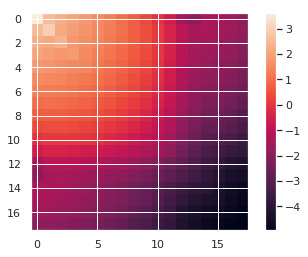

In [12]:
im = plt.imshow(np.log10(covmat) )
plt.colorbar(im)

In [13]:
np.save('meas_cov_testboxes_gg.npy', covmat)

In [154]:
shot_cov_mean = cov.mean(axis = 0)

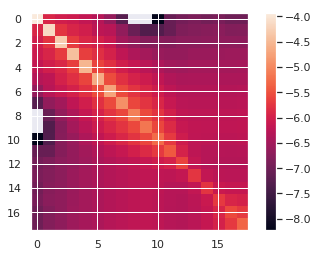

In [155]:
im = plt.imshow(np.log10(shot_cov_mean) )
plt.colorbar(im)

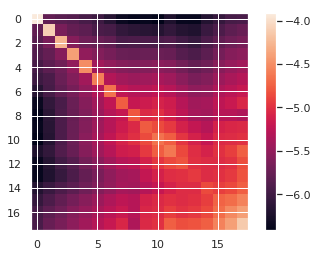

In [156]:
im = plt.imshow(np.log10(shot_cov_mean+covmat) )
plt.colorbar(im)

In [165]:
#emu_cov = np.load('/home/users/swmclau2/Git/pearce/bin/covmat/xi_gg_nh_emu_cov.npy')
emu_cov = np.load('/home/users/swmclau2/Git/pearce/bin/covmat/xi_gg_nh_emu_log_cov_ds10.npy')

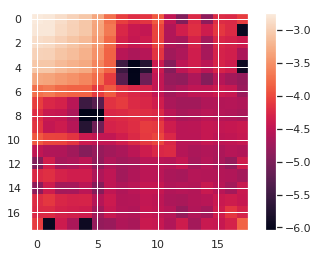

In [168]:
im = plt.imshow(np.log10(abs(emu_cov) ) )
plt.colorbar(im)

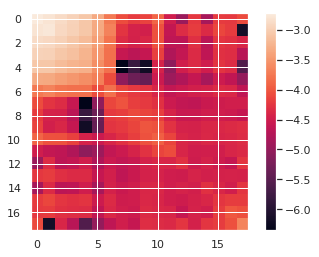

In [170]:
im = plt.imshow(np.log10(abs(shot_cov_mean+covmat+emu_cov) ) )
plt.colorbar(im)

In [159]:
import h5py
f = h5py.File('/scratch/users/swmclau2/PearceMCMC/pearce_mcmc_nh_gg_v2.hdf5')
jk_cov = f['cov'].value - emu_cov
f.close()

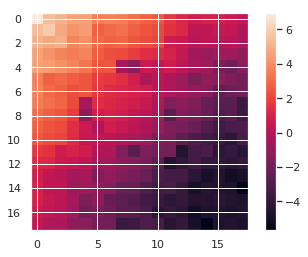

In [160]:
im = plt.imshow(np.log10(abs(jk_cov) ) )
plt.colorbar(im)

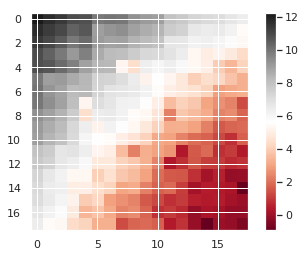

In [161]:
im = plt.imshow(np.log10(abs(jk_cov)) - np.log10(abs(covmat) ), cmap ='RdGy')
plt.colorbar(im)#, vmin = -3.5, vmax = 3.5)

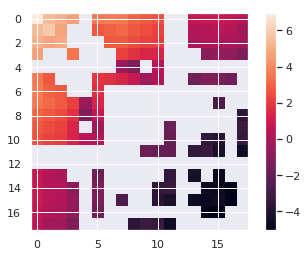

In [162]:
im = plt.imshow(np.log10(jk_cov - covmat ) )
plt.colorbar(im)

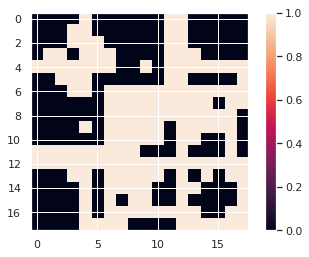

In [163]:
im = plt.imshow(jk_cov < covmat ) 
plt.colorbar(im)

In [164]:
(covmat - jk_cov)[-3:, -3:]

array([[ -3.54569243e-05,  -9.05412842e-06,   1.83979876e-06],
       [ -9.05412842e-06,   5.80713541e-06,   8.15769794e-06],
       [  1.83979876e-06,   8.15769794e-06,   4.66328098e-05]])